# Single t-test

The Student's t-test is a statistical method used to compare the means of two groups to determine if they are significantly different from each other. It is commonly employed in hypothesis testing when the data sets being compared follow a normal distribution and have similar variances. The t-test assesses whether the observed differences between the group means are likely to be due to random chance or if they are statistically significant. The result of the test is a t-statistic and a p-value, with a lower p-value indicating stronger evidence against the null hypothesis (no significant difference). This test is widely used in various fields, including science, medicine, and social sciences, to draw conclusions about the significance of differences between sample means.

In [42]:
import pandas as pd
import numpy as np

In [43]:
df = pd.read_csv('/Users/luca.rugiu/Desktop/Data_science_tools/ttests/ttest.csv')
df.head()

,WEEK_ID,MEMBERSHIP,ENGAGEMENT_EVENTS
0,202001,b2c_payer,221238
1,202002,b2c_payer,471124
2,202003,b2c_payer,522385
3,202004,b2c_payer,531555
4,202005,b2c_payer,543771


In [44]:
df = pd.DataFrame(df)
df

,WEEK_ID,MEMBERSHIP,ENGAGEMENT_EVENTS
0,202001,b2c_payer,221238
1,202002,b2c_payer,471124
2,202003,b2c_payer,522385
3,202004,b2c_payer,531555
4,202005,b2c_payer,543771
...,...,...,...
173,202132,basic,527893
174,202133,basic,528682
175,202134,basic,532956
176,202135,basic,570819


check data are properly loaded:

In [45]:
#some summary stats
df.groupby("MEMBERSHIP").mean()

,WEEK_ID,ENGAGEMENT_EVENTS
MEMBERSHIP,,
b2c_payer,202064.011236,416578.213483
basic,202064.011236,566658.775281


array([[<AxesSubplot: title={'center': 'ENGAGEMENT_EVENTS'}>]],
      dtype=object)

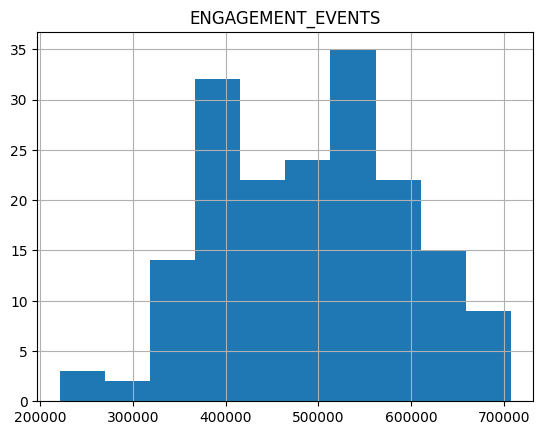

In [46]:
df.hist(column='ENGAGEMENT_EVENTS')

In [47]:
df.groupby('MEMBERSHIP').describe()

WEEK_ID                                                          \
             count           mean        std       min       25%       50%   
MEMBERSHIP                                                                   
b2c_payer     89.0  202064.011236  47.166652  202001.0  202023.0  202045.0   
basic         89.0  202064.011236  47.166652  202001.0  202023.0  202045.0   

                               ENGAGEMENT_EVENTS                               \
                 75%       max             count           mean           std   
MEMBERSHIP                                                                      
b2c_payer   202114.0  202136.0              89.0  416578.213483  64302.167550   
basic       202114.0  202136.0              89.0  566658.775281  73839.961029   

                                                              
                 min       25%       50%       75%       max  
MEMBERSHIP                                                    
b2c_payer   221238.0  381524.0  413437.0  454823.0  548777.0  
basic       278027.0  523072.0  564070.0  626043.0  707629.0

single t_test:
Let’s say that the average number of eng.events is different from the average one for Xing in the previous years (389341). 
We want to know if our sample is about the same or significantly different from xing average. 
Let’s test it with a single sample t-test:

In [48]:
#If data are normally distributed go ahead, else skip to line 89

from scipy.stats import ttest_1samp

var = df['ENGAGEMENT_EVENTS']

tscore, pvalue = ttest_1samp(var, popmean=389341)
print("t Statistic: ", tscore)  
print("P Value: ", pvalue)# mu is the mean from previous years, I made it up just for this example


#what do the result say?

#t : The smaller the t-value, the more similarity exists between the two sample sets. 
#A large t-score indicates that the groups are different. A small t-score indicates that the groups are similar.

# df degreees of freedom (sample size minus 1)

# p value...it says here that it is significanlty different

t Statistic:  13.361705151741539
P Value:  1.3094033633606727e-28


In [49]:
sample_mean = np.mean(var)
sample_mean

491618.4943820225

In [50]:
sample_standard_deviation = (df.std()['ENGAGEMENT_EVENTS'])
sample_standard_deviation

/var/folders/ks/wmds9wf92rs0mnhl7gwxbt200000gp/T/ipykernel_54730/665749509.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  sample_standard_deviation = (df.std()['ENGAGEMENT_EVENTS'])


102124.08939346031

In [51]:
population_mean = 389341

In [52]:
cohens_d = (sample_mean - population_mean)/sample_standard_deviation
cohens_d

1.001502143024954

It looks like there is a very big difference (d = 1) between our sample and the population average. 
You may have also noticed that I took the absolute value of the Cohen’s d I computed; generally, we present Cohen’s d 
as a positive value representing only the difference in standard deviations, not the direction of the difference
as a reference:
0.2 - Small effect
0.5 - Medium effect
0.8 - Large effect

# Two samples t-test

Now that we have an understanding of how our sample engagement_events compares to the population, 
we’re interested in whether there is a difference in engagement_events between paying and not paying members. 
data are real here
We can test this using a two sample t-test and the following code:

In [53]:
from statsmodels.stats.weightstats import ttest_ind
premium = df.query('MEMBERSHIP == "b2c_payer"')['ENGAGEMENT_EVENTS']
basic = df.query('MEMBERSHIP == "basic"')['ENGAGEMENT_EVENTS']

ttest_ind(premium, basic)

(-14.460244180420188, 9.636624372109385e-32, 176.0)

pip install pingouin

In [54]:
import pingouin as pg

res = pg.ttest(premium, basic, correction=False)
display(res)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-14.460244,176,two-sided,9.636624e-32,"[-170563.56, -129597.56]",2.167682,2.058e+28,1.0


Rather than testing against a standard, we are testing whether the difference between means is equal to 0. Second, the sample estimates now give us two numbers–the means for each of the groups.

The results indicate that there is a significant difference between the groups (p < .001), and, 
looking at the sample mean estimates, it looks like paying members get about 15K events less than basic users.
be aware that these data are absolute values and they should be adjusted for the number of users for each group, 
this is just for the exercise.

Pinguin directly displays the Cohen effect size.


<AxesSubplot: xlabel='MEMBERSHIP', ylabel='ENGAGEMENT_EVENTS'>

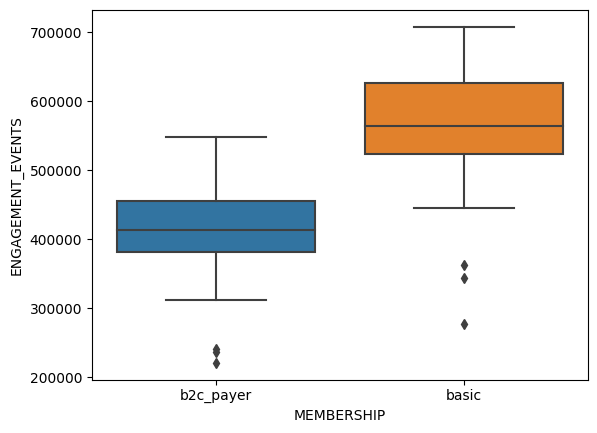

In [55]:
import seaborn as sns

sns.boxplot(x='MEMBERSHIP', y='ENGAGEMENT_EVENTS', data=df)

# Alterntive to Normally distributed data

In [56]:
df = pd.read_csv('/Users/luca.rugiu/Desktop/Data_science_tools/Wilcoxon_test.csv')
df.head()

,USER_ID,TOT_VISITS
0,16797868,1
1,3443604,1
2,19200683,2
3,12007242,1
4,19211193,2


In [ ]:
df.groupby('TOT_VISITS').describe()

array([[<AxesSubplot: title={'center': 'TOT_VISITS'}>]], dtype=object)

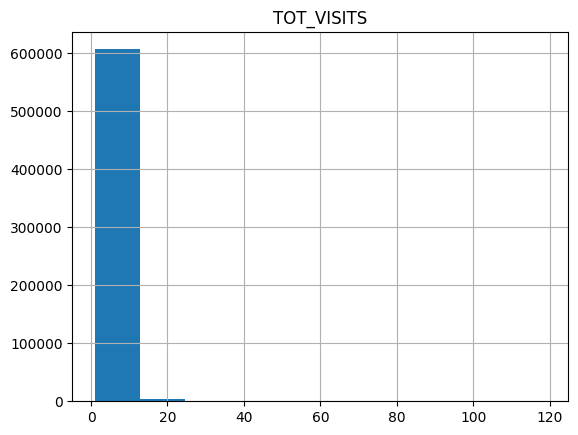

In [58]:
df.hist(column='TOT_VISITS')

One-sample wilcoxon test

In [59]:
# compare samples TO AN AVERAGE
import numpy as np
from scipy.stats import ttest_1samp, wilcoxon, ttest_ind, mannwhitneyu

var = df['TOT_VISITS']
z_statistic, p_value = wilcoxon(var - 389341)
print ("one-sample t-test", p_value)

one-sample t-test 0.0
